In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
Categories=['cats','dogs']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='images/' 

#path which contains all the categories of images
for i in Categories:
  
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)

target=np.array(target_arr)

loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


In [3]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
flat_data.shape

(750, 67500)

In [5]:
target.shape

(750,)

In [6]:
#dataframe
df=pd.DataFrame(flat_data) 
df['Target']=target
df.shape

(750, 67501)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.209437,0.191608,0.129148,0.223540,0.189620,0.122749,0.322876,0.275108,0.192446,0.305545,...,0.788924,0.785003,0.808532,0.783294,0.779373,0.802902,0.779663,0.775741,0.799271,0
1,0.107517,0.119281,0.138889,0.091344,0.103109,0.122717,0.082496,0.094261,0.113869,0.090338,...,0.513280,0.464237,0.390697,0.633083,0.584040,0.510499,0.588490,0.539448,0.465907,0
2,0.195323,0.230617,0.260006,0.157700,0.195896,0.231189,0.170617,0.209833,0.245127,0.202500,...,0.201119,0.258111,0.278634,0.167488,0.226311,0.245919,0.152500,0.211323,0.230931,0
3,0.693872,0.576224,0.442412,0.694176,0.572160,0.426716,0.685620,0.563036,0.407295,0.663681,...,0.246474,0.165952,0.145429,0.254081,0.171728,0.152120,0.257662,0.175309,0.155701,0
4,0.049171,0.248248,0.101166,0.001267,0.132413,0.013820,0.022266,0.104180,0.017763,0.028975,...,0.013853,0.000000,0.003922,0.006824,0.001020,0.003921,0.000969,0.006874,0.001698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
746,0.488054,0.491975,0.472368,0.460875,0.464797,0.445189,0.482605,0.486526,0.466919,0.482453,...,0.509517,0.517360,0.505596,0.481085,0.488928,0.477163,0.466381,0.474224,0.462460,1
747,0.208812,0.224499,0.220577,0.213181,0.228867,0.224946,0.214028,0.229714,0.225792,0.208916,...,0.680668,0.712040,0.723804,0.692363,0.723735,0.731579,0.634303,0.665676,0.673519,1
748,0.360196,0.433690,0.193553,0.365262,0.438757,0.202988,0.380830,0.453409,0.221697,0.394728,...,0.225582,0.338445,0.111574,0.267562,0.390595,0.137975,0.265799,0.385908,0.115764,1


In [8]:
#input data 
x=df.iloc[:,:-1] 
#output data
y=df.iloc[:,-1]

In [9]:
x

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.209437,0.191608,0.129148,0.223540,0.189620,0.122749,0.322876,0.275108,0.192446,0.305545,...,0.810796,0.788924,0.785003,0.808532,0.783294,0.779373,0.802902,0.779663,0.775741,0.799271
1,0.107517,0.119281,0.138889,0.091344,0.103109,0.122717,0.082496,0.094261,0.113869,0.090338,...,0.306027,0.513280,0.464237,0.390697,0.633083,0.584040,0.510499,0.588490,0.539448,0.465907
2,0.195323,0.230617,0.260006,0.157700,0.195896,0.231189,0.170617,0.209833,0.245127,0.202500,...,0.205079,0.201119,0.258111,0.278634,0.167488,0.226311,0.245919,0.152500,0.211323,0.230931
3,0.693872,0.576224,0.442412,0.694176,0.572160,0.426716,0.685620,0.563036,0.407295,0.663681,...,0.148785,0.246474,0.165952,0.145429,0.254081,0.171728,0.152120,0.257662,0.175309,0.155701
4,0.049171,0.248248,0.101166,0.001267,0.132413,0.013820,0.022266,0.104180,0.017763,0.028975,...,0.003922,0.013853,0.000000,0.003922,0.006824,0.001020,0.003921,0.000969,0.006874,0.001698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
746,0.488054,0.491975,0.472368,0.460875,0.464797,0.445189,0.482605,0.486526,0.466919,0.482453,...,0.493621,0.509517,0.517360,0.505596,0.481085,0.488928,0.477163,0.466381,0.474224,0.462460
747,0.208812,0.224499,0.220577,0.213181,0.228867,0.224946,0.214028,0.229714,0.225792,0.208916,...,0.723169,0.680668,0.712040,0.723804,0.692363,0.723735,0.731579,0.634303,0.665676,0.673519
748,0.360196,0.433690,0.193553,0.365262,0.438757,0.202988,0.380830,0.453409,0.221697,0.394728,...,0.102042,0.225582,0.338445,0.111574,0.267562,0.390595,0.137975,0.265799,0.385908,0.115764


In [9]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42, stratify=y)

In [11]:
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix

classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(x_train,y_train)


y_pred=classifier.predict(x_test) 

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

Accuracy: 0.574468085106383
[[46 44]
 [36 62]]
              precision    recall  f1-score   support

         cat       0.56      0.51      0.53        90
         dog       0.58      0.63      0.61        98

    accuracy                           0.57       188
   macro avg       0.57      0.57      0.57       188
weighted avg       0.57      0.57      0.57       188



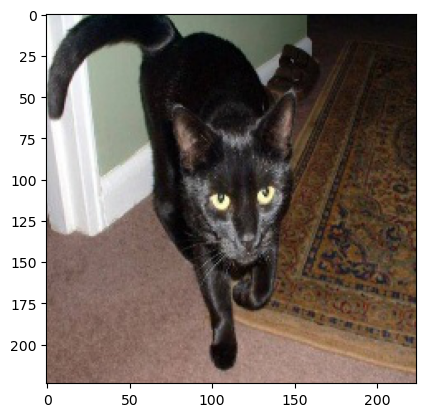

[1]
The predicted image is : dogs


In [12]:
path='/home/bkn/Programming/Dataset/Dog_Cat_Dataset/training/cats/cat_0152.jpg'
img=imread(path)
plt.imshow(img)
plt.show()

img_resize=resize(img,(150,150,3))

l=[img_resize.flatten()]
y_pred=classifier.predict(l)
print(y_pred)

print("The predicted image is : "+Categories[classifier.predict(l)[0]])

In [13]:
from sklearn.ensemble import RandomForestClassifier
target_names=['cat', 'dog']

rfmodel= RandomForestClassifier(n_estimators=51,criterion='gini',max_features='log2')
rfmodel.fit(x_train,y_train)
ypred=rfmodel.predict(x_test)

print("accuracy:", accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test, ypred, target_names=target_names))

accuracy: 0.5957446808510638
[[46 44]
 [32 66]]
              precision    recall  f1-score   support

         cat       0.59      0.51      0.55        90
         dog       0.60      0.67      0.63        98

    accuracy                           0.60       188
   macro avg       0.59      0.59      0.59       188
weighted avg       0.60      0.60      0.59       188



In [14]:
# Defining the parameters grid for GridSearchCV
param_grid={'n_estimators':[101,201],
            'criterion':['gini','entropy'],
            'max_features':['log2','sqrt']}
  
# Creating a Randomforesr model
rfmodel= RandomForestClassifier()
  
# Creating a model using GridSearchCV with the parameters grid
rfmodel=GridSearchCV(rfmodel,param_grid,verbose=1,return_train_score=True)

In [15]:
# Training the model using the training data
rfmodel.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [101, 201]},
             return_train_score=True, verbose=1)

In [16]:
ypred=rfmodel.predict(x_test)
print("accuracy:", accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test, ypred, target_names=target_names))

print(rfmodel.best_params_)

print(rfmodel.best_score_)

accuracy: 0.6436170212765957
[[54 36]
 [31 67]]
              precision    recall  f1-score   support

         cat       0.64      0.60      0.62        90
         dog       0.65      0.68      0.67        98

    accuracy                           0.64       188
   macro avg       0.64      0.64      0.64       188
weighted avg       0.64      0.64      0.64       188

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 201}
0.6299620733249052


In [18]:
from sklearn.ensemble import RandomForestClassifier
target_names=['cat', 'dog']

rfmodel= RandomForestClassifier(n_estimators=201,criterion='gini',max_features='sqrt')
rfmodel.fit(x_train,y_train)
ypred=rfmodel.predict(x_test)

print("accuracy:", accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test, ypred, target_names=target_names))

accuracy: 0.6063829787234043
[[52 38]
 [36 62]]
              precision    recall  f1-score   support

         cat       0.59      0.58      0.58        90
         dog       0.62      0.63      0.63        98

    accuracy                           0.61       188
   macro avg       0.61      0.61      0.61       188
weighted avg       0.61      0.61      0.61       188

